#### **Detrending Notebook**

In [14]:
region = "Kuro"

**Step 0: Tech Preamble**

In [2]:
from esn_dev import detrend
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

**Step 1 Data Prep**

In [ ]:
CESM_data = np.load(f"/home/hmelzer/work/esn/Hannah/Data/ssh_{region}.npy")
lon = np.load(f"/home/hmelzer/work/esn/Hannah/Data/lon_{region}.npy")
lat = np.load(f"/home/hmelzer/work/esn/Hannah/Data/lat_{region}.npy")

_Upsample to daily data_

In [4]:
nT_daily = CESM_data.shape[0] * 3  # since each point originally spans 3 days
CESM_data_daily = detrend.upscale(CESM_data, nT_daily)

_Downsample to 5-daily data_

In [5]:
CESM_data_five_daily = CESM_data_daily[::5]

In [ ]:
np.save(f"Data/ssh_{region}_5d.npy", CESM_data_five_daily)

**Step 2: compute pol trend (using lsq)**

In [7]:
cycle_length = 73  # 365 days / 5-day spacing
ft_detrended, b, C = detrend.separate_trends_unscaled(CESM_data_five_daily, cycle_length)

In [ ]:
np.save(f"Data/ssh_{region}_detrended.npy", ft_detrended)

**Step 3: Plot**

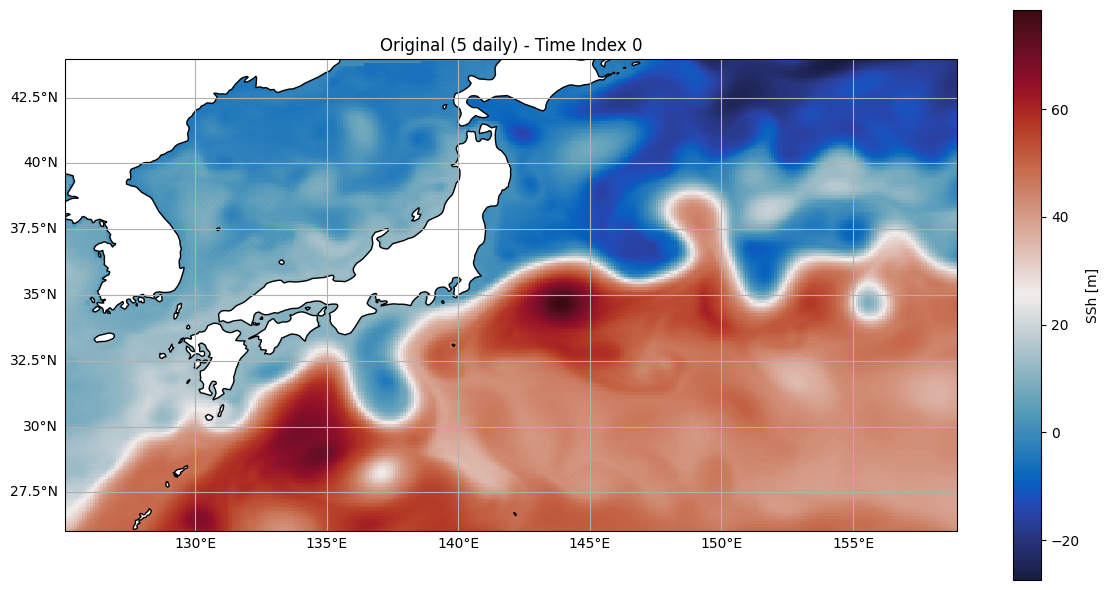

In [17]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
pcm = ax.pcolormesh(lon, lat, CESM_data_five_daily[0, :, :], 
                    shading='auto', 
                    cmap=cmocean.cm.balance, 
                    transform=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND, facecolor='white', zorder=1)
ax.coastlines()
ax.set_extent([lon.min() + 1, lon.max() - 1, lat.min() + 1, lat.max() - 1], crs=ccrs.PlateCarree())

# Gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Colorbar and title
plt.colorbar(pcm, ax=ax, orientation='vertical', label='SSh [m]')
ax.set_title('Original (5 daily) - Time Index 0')
plt.tight_layout()
plt.savefig(f"figures/Orginal_{region}")
plt.show()

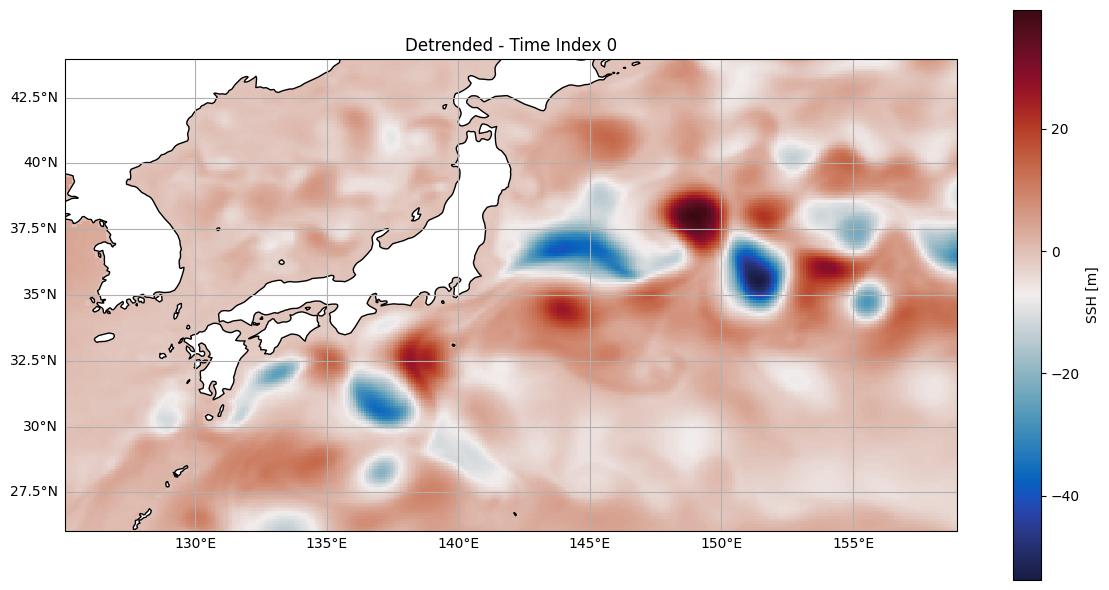

In [18]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
pcm = ax.pcolormesh(lon, lat, ft_detrended[0, :, :], 
                    shading='auto', 
                    cmap=cmocean.cm.balance, 
                    transform=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND, facecolor='white', zorder=1)
ax.coastlines()
ax.set_extent([lon.min() + 1, lon.max() - 1, lat.min() + 1, lat.max() - 1], crs=ccrs.PlateCarree())

# Gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Colorbar and title
plt.colorbar(pcm, ax=ax, orientation='vertical', label='SSH [m]')
ax.set_title('Detrended - Time Index 0')
plt.tight_layout()
plt.savefig(f"figures/Detrended_{region}")
plt.show()

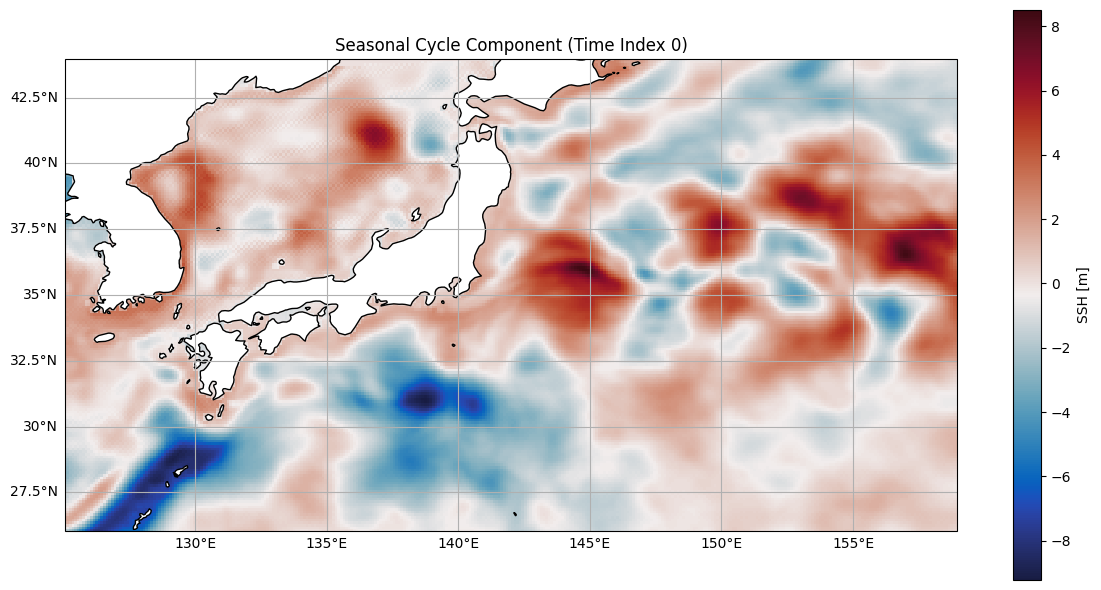

In [19]:
# Example: C.shape = (200, 360, 73), lon.shape = (360,), lat.shape = (200,)
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
pcm = ax.pcolormesh(lon, lat, C[:, :, 0], 
                    shading='auto', 
                    cmap=cmocean.cm.balance, 
                    transform=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND, facecolor='white', zorder=1)
ax.coastlines()
ax.set_extent([lon.min() + 1, lon.max() - 1, lat.min() + 1, lat.max() - 1], crs=ccrs.PlateCarree())

# Gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Colorbar and title
plt.colorbar(pcm, ax=ax, orientation='vertical', label='SSH [m]')
ax.set_title('Seasonal Cycle Component (Time Index 0)')
plt.tight_layout()
plt.savefig(f"figures/Cycle_{region}")
plt.show()

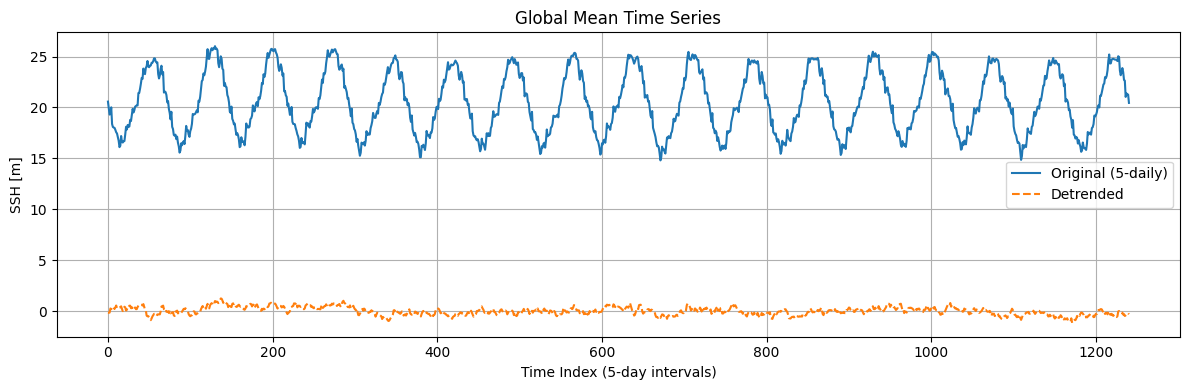

In [20]:
original_mean = CESM_data_five_daily.mean(axis=(1, 2))
detrended_mean = ft_detrended.mean(axis=(1, 2))

# Plot
plt.figure(figsize=(12, 4))
plt.plot(original_mean, label='Original (5-daily)', color='tab:blue')
plt.plot(detrended_mean, label='Detrended', color='tab:orange', linestyle='--')

plt.title('Global Mean Time Series')
plt.xlabel('Time Index (5-day intervals)')
plt.ylabel('SSH [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"figures/Time_ser_{region}")
plt.show()


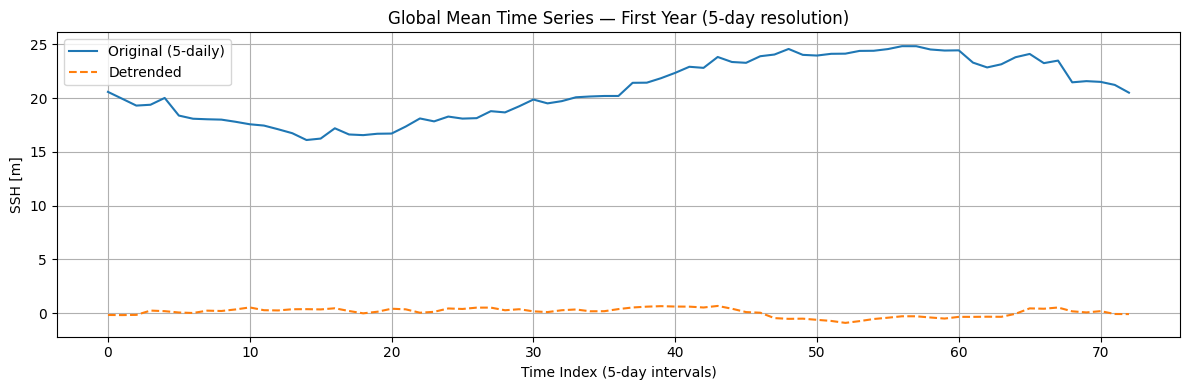

In [21]:
original_mean = CESM_data_five_daily.mean(axis=(1, 2))[:73]
detrended_mean = ft_detrended.mean(axis=(1, 2))[:73]

# Plot
plt.figure(figsize=(12, 4))
plt.plot(original_mean, label='Original (5-daily)', color='tab:blue')
plt.plot(detrended_mean, label='Detrended', color='tab:orange', linestyle='--')

plt.title('Global Mean Time Series — First Year (5-day resolution)')
plt.xlabel('Time Index (5-day intervals)')
plt.ylabel('SSH [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"figures/Time_ser_1year_{region}")
plt.show()
